In [1]:
import PIL
import numpy as np
import pandas as pd
import pytesseract
import spacy
import cv2
import matplotlib.pyplot as plt

In [2]:
img = PIL.Image.open('data/img1014.png')

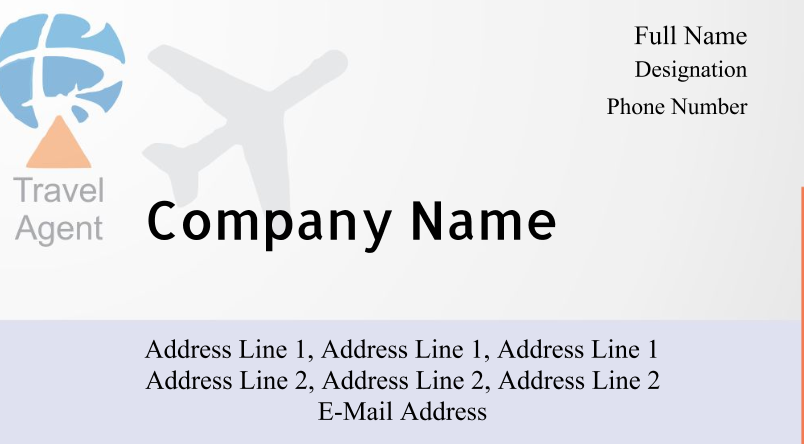

In [3]:
img

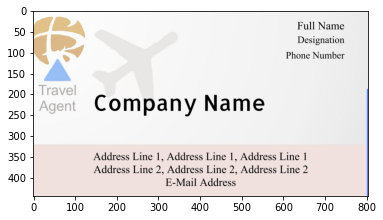

In [4]:
imcv = cv2.imread('data/img1014.png')
plt.imshow(imcv)

### Image to STRING

In [5]:
text_cv = pytesseract.image_to_string(imcv)
print(text_cv)

Designation

€ ® Phone Number

Company Name

Gls Full Name
m,

Address Line 1, Address Line 1, Address Line 1
Address Line 2, Address Line 2, Address Line 2
E-Mail Address



In [6]:
text_pil = pytesseract.image_to_string(img)
print(text_pil)

Designation

€ ® Phone Number

Company Name

Ga Full Name
m,

Address Line 1, Address Line 1, Address Line 1
Address Line 2, Address Line 2, Address Line 2
E-Mail Address



### Image to DATA

In [7]:
im2data = pytesseract.image_to_data(imcv)

In [8]:
vals = list (map(lambda x: x.split('\t'), im2data.split('\n')) )

df = pd.DataFrame(vals[1:], columns= vals[0])

df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,804,444,-1,
1,2,1,1,0,0,0,635,60,112,22,-1,
2,3,1,1,1,0,0,635,60,112,22,-1,
3,4,1,1,1,1,0,635,60,112,22,-1,
4,5,1,1,1,1,1,635,60,112,22,96,Designation


In [9]:
df.iloc[4]

level                  5
page_num               1
block_num              1
par_num                1
line_num               1
word_num               1
left                 635
top                   60
width                112
height                22
conf                  96
text         Designation
Name: 4, dtype: object

In [10]:
print(df.isna().sum())
print(';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')
print(df.info())

level        0
page_num     1
block_num    1
par_num      1
line_num     1
word_num     1
left         1
top          1
width        1
height       1
conf         1
text         1
dtype: int64
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      51 non-null     object
 1   page_num   50 non-null     object
 2   block_num  50 non-null     object
 3   par_num    50 non-null     object
 4   line_num   50 non-null     object
 5   word_num   50 non-null     object
 6   left       50 non-null     object
 7   top        50 non-null     object
 8   width      50 non-null     object
 9   height     50 non-null     object
 10  conf       50 non-null     object
 11  text       50 non-null     object
dtypes: object(12)
memory usage: 4.9+ KB
None


In [11]:
# finding indices of NULL items
list(np.where(df.isna()))[0]

array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])

In [12]:
# dropping all nul values by index
df.drop(index = 50, inplace=True)
print(df.isna().sum())

level        0
page_num     0
block_num    0
par_num      0
line_num     0
word_num     0
left         0
top          0
width        0
height       0
conf         0
text         0
dtype: int64


In [13]:
# converting the dtype from object to int for respected columns
for name in [df.columns[:-1]]:
    df[name] = df[name].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      50 non-null     int64 
 1   page_num   50 non-null     int64 
 2   block_num  50 non-null     int64 
 3   par_num    50 non-null     int64 
 4   line_num   50 non-null     int64 
 5   word_num   50 non-null     int64 
 6   left       50 non-null     int64 
 7   top        50 non-null     int64 
 8   width      50 non-null     int64 
 9   height     50 non-null     int64 
 10  conf       50 non-null     int64 
 11  text       50 non-null     object
dtypes: int64(11), object(1)
memory usage: 5.1+ KB


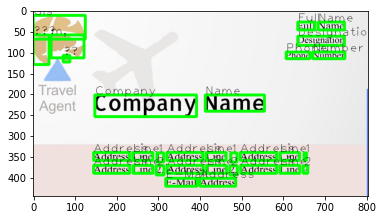

In [99]:
image = imcv.copy()

# creating a function
# to visualize 
# 1 = page Number
# 2 = block #
# 3 = Para #
# 4 = line #
# 5 = Word #

def drawer(inp):
    for l, x,y,w,h,c,t in df [['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
        if l == inp:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 6 )
        # putting text above the bounding boxes if found any
        if inp == 5:
            cv2.putText(image, t, (x,y), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,0), 1)



drawer(5)
    
plt.imshow(image)
        